<a href="https://colab.research.google.com/github/syoung7388/DeepLearningBasicModel/blob/main/2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN**

**[Overview]**
1. 라이브러리 설정 
2. HyperParameter 설정 
3. GPU 설정 
4. Data 준비
5. 모델 설계 
6. 모델 훈련 (Training)
7. 모델 검증 (Testing)

**1. 라이브러리**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm 

**2. HyperParameter**

In [ ]:
seed= 9712
epochs= 10
batch_size= 64
lr= 1e-4
dropout= 0.2
n_class= 10
# seed 
torch.manual_seed = seed 

**3. GPU 설정**

In [ ]:
! nvidia-smi
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

Tue Aug  2 04:23:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**4. Data 준비**

In [ ]:
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, transform=transforms.ToTensor())

print(f"[Dataset] train: {len(train_dataset)}, test: {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)


print(f"[DataLoader] train: {len(train_dataloader)}, test: {len(test_dataloader)}")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Dataset] train: 60000, test: 10000
[DataLoader] train: 938, test: 10000


**5. Model 설계**

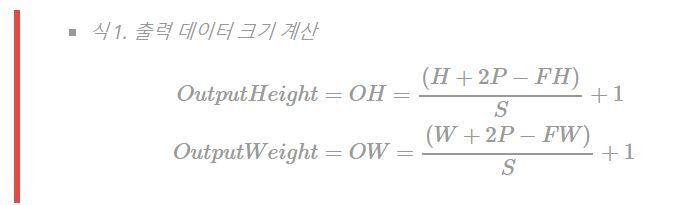

In [ ]:


class CNN(nn.Module):
    def __init__(self, n_class, dropout):      
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, padding=2) #(input_channel, output_channel, filter_size, padding_size)
        self.conv2 = nn.Conv2d(32, 32, 5, padding=2)
        self.fc1 = nn.Linear(32*7*7, 1024)
        self.classifier_layer = nn.Linear(1024, n_class)
        self.softmax = nn.Softmax(dim=1) 
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32*7*7)
        x = self.dropout(F.relu(self.fc1(x)))
        output = self.classifier_layer(x)
        return self.softmax(output)




#model 불러오기
model = CNN(n_class, dropout).to(device)

**6. Model 훈련 (Training)**

In [ ]:
loss_fn= nn.CrossEntropyLoss().to(device)
optimizer= optim.Adam(model.parameters(), lr=lr)

tot_train_loss= []
model.train()
for e in range(1, epochs+1):
    print(f"============= [Epochs] {e}/{epochs} =============")
    train_loss= 0.0
    for datas, labels in tqdm(train_dataloader):
        optimizer.zero_grad()        
        datas= datas.to(device)
        labels= labels.to(device)

        output= model(datas)
        loss= loss_fn(output, labels)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
    tot_train_loss.append(train_loss/len(train_dataloader))
    print(f"Loss: {train_loss/len(train_dataloader):.3f}")

============= [Epochs] 1/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.635
============= [Epochs] 2/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.515
============= [Epochs] 3/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.498
============= [Epochs] 4/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.490
============= [Epochs] 5/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.485
============= [Epochs] 6/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.482
============= [Epochs] 7/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.479
============= [Epochs] 8/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.477
============= [Epochs] 9/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.476
============= [Epochs] 10/10 =============


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.474


**7. Model 검증 (Testing)**

In [ ]:
with torch.no_grad():
    model.eval()
    test_acc= 0.0
    for datas, labels in tqdm(test_dataloader):
        
        datas= datas.to(device)
        labels= labels.to(device)
        
        output= model(datas)
        
        preds= torch.argmax(output, dim=1)
        test_acc+= preds.eq(labels).sum()

print(f"[Test Result] {(test_acc/len(test_dataloader.dataset))*100:.3f}%")

  0%|          | 0/10000 [00:00<?, ?it/s]

[Test Result] 98.880%


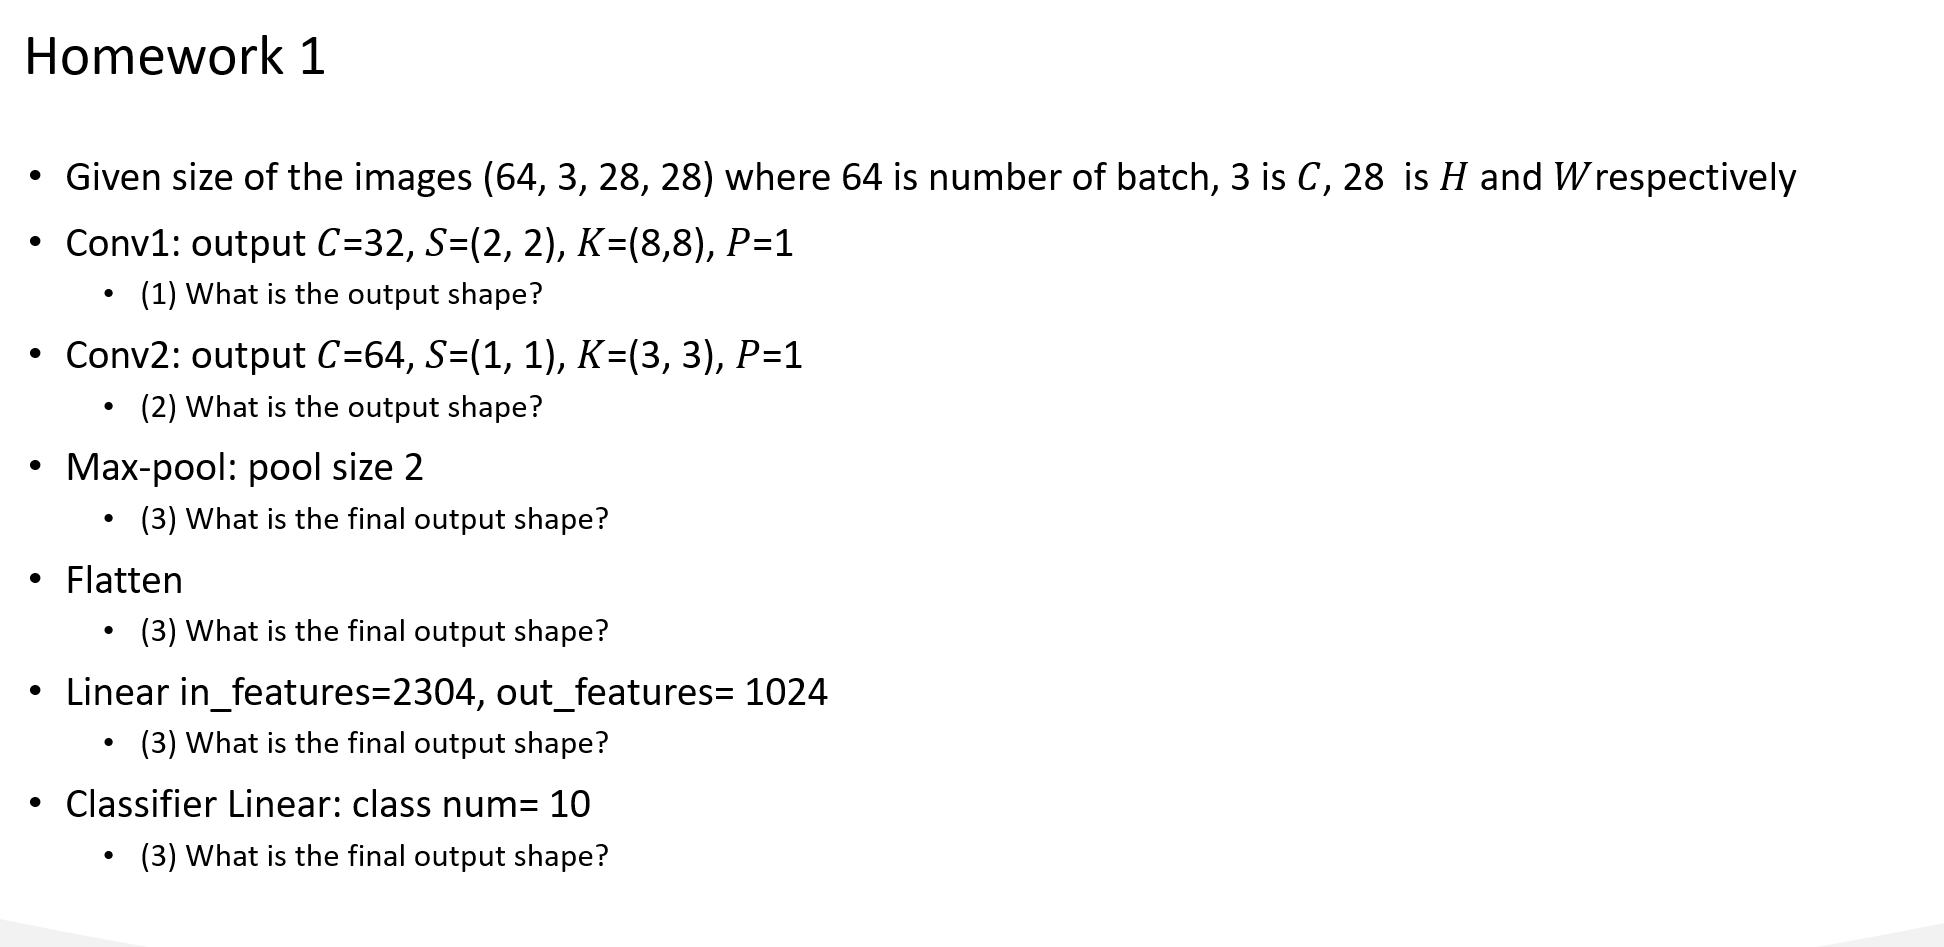